In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [74]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [76]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

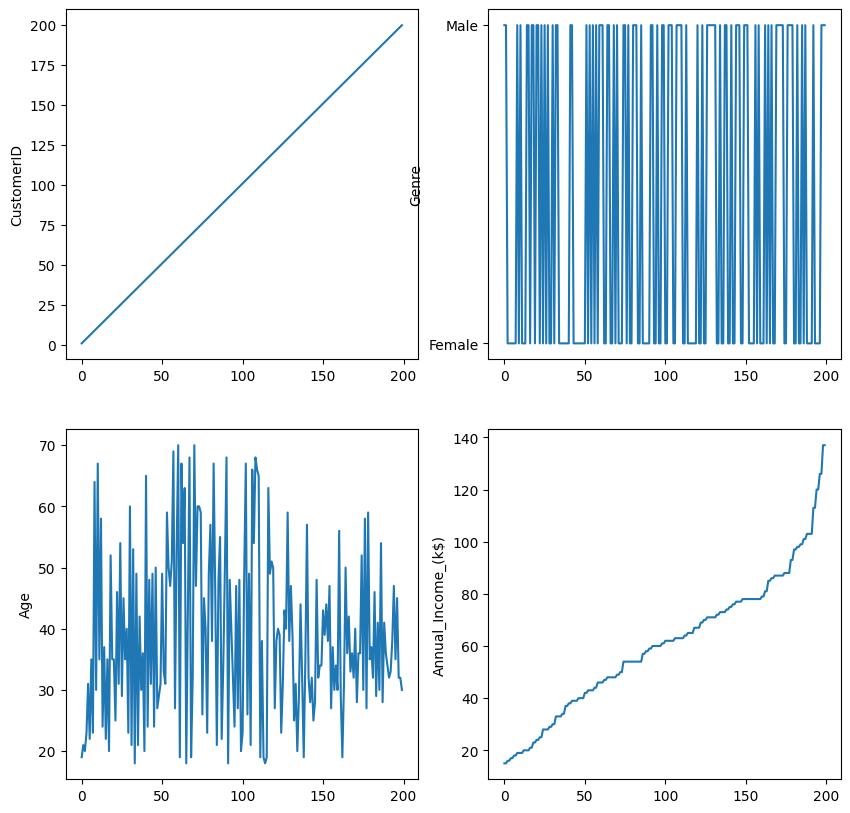

In [77]:
plt.figure(figsize = (10,10))
pl_nu = 1
for i in df.columns:
  if pl_nu <=4:
    plt.subplot(2,2,pl_nu)
    sns.lineplot(df[i])
  pl_nu +=1
plt.show()

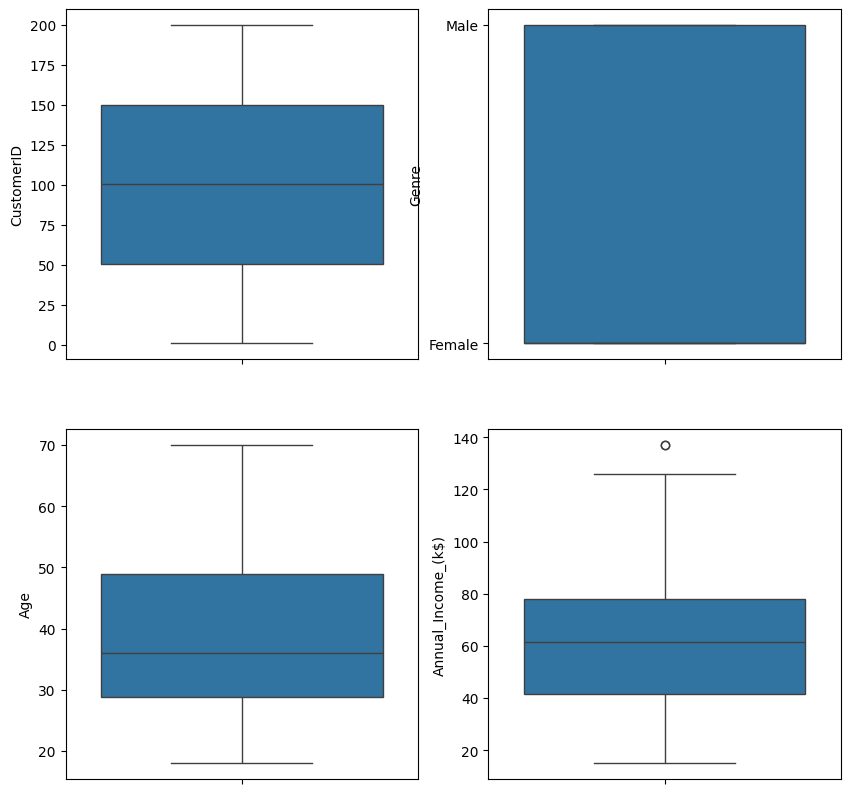

In [78]:
plt.figure(figsize = (10,10))
pl_nu = 1
for i in df.columns:
  if pl_nu <=4:
    plt.subplot(2,2,pl_nu)
    sns.boxplot(df[i])
  pl_nu +=1
plt.show()

<ipython-input-79-6b17710e5a75>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,pl_nu)
<ipython-input-79-6b17710e5a75>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,pl_nu)
<ipython-input-79-6b17710e5a75>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,pl_nu)


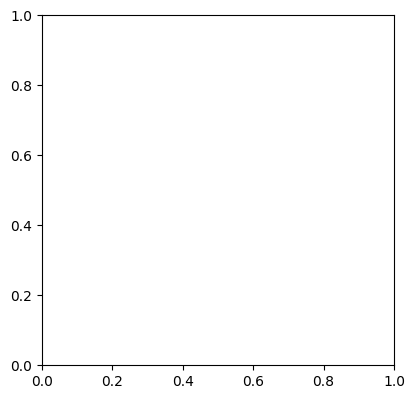

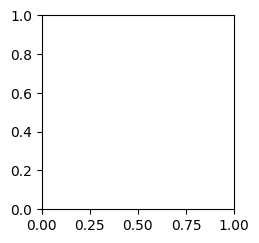

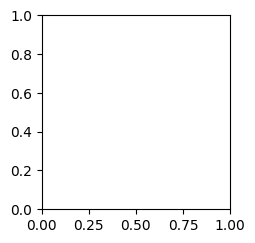

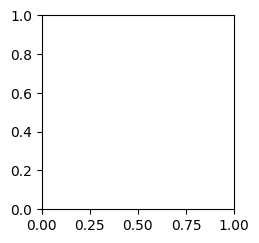

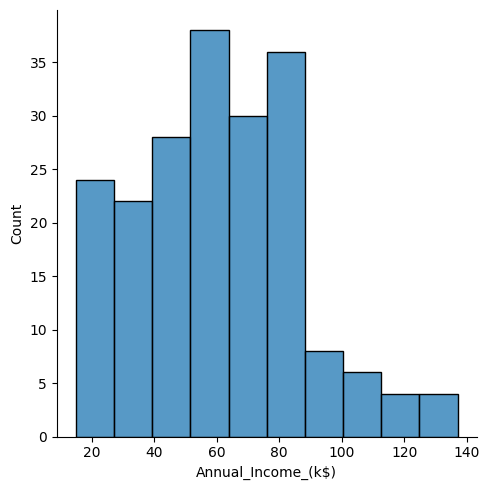

In [79]:
plt.figure(figsize = (10,10))
pl_nu = 1
for i in df.columns:
  if pl_nu <=4:
    plt.subplot(2,2,pl_nu)
    sns.displot(df[i])
  pl_nu +=1
plt.show()

In [80]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()
df['Genre'] = lbl.fit_transform(df['Genre'])

In [81]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [82]:
len(df)

200

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

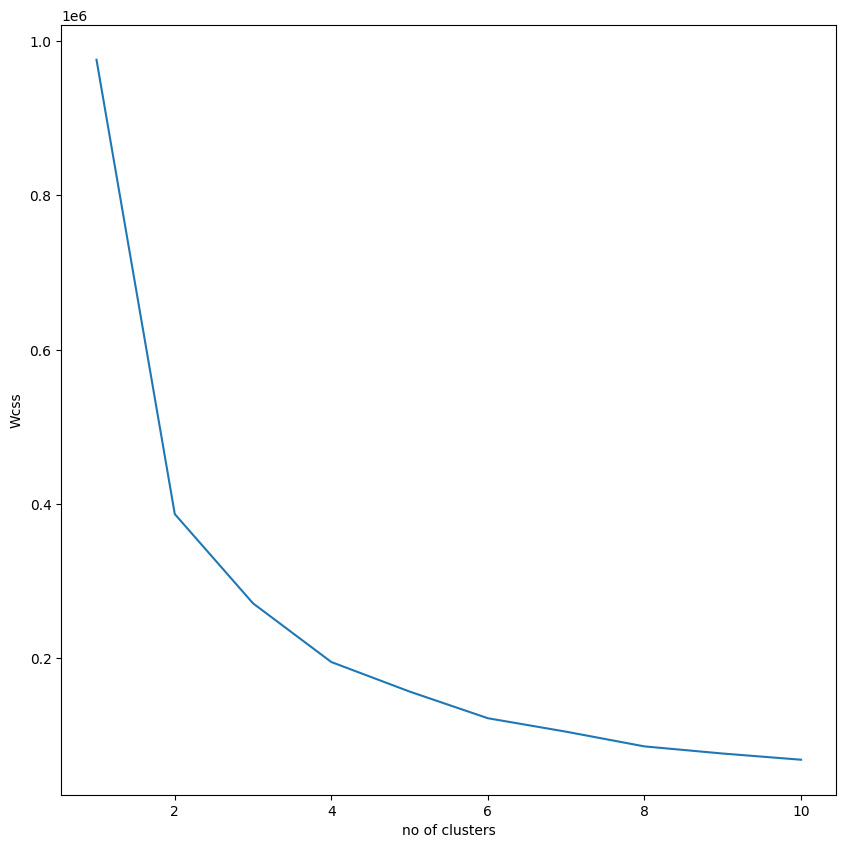

In [83]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters= i, init = 'k-means++', random_state = 42)
  km.fit(df)
  wcss.append(km.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel ('Wcss')
plt.show()

In [84]:
wcss

[975512.0600000003,
 387065.71377137717,
 271396.5629660315,
 195401.19855991466,
 157157.7579059829,
 122625.38919480509,
 105192.97703222703,
 86146.21762410295,
 76917.61588179087,
 68900.88594790665]

In [85]:
kmm = KMeans(n_clusters= 5,init = 'k-means++')
y_mean =kmm.fit_predict(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [86]:
kmm.inertia_

157183.29637394767

In [87]:
y_mean

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [88]:
kmm.labels_

array([4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

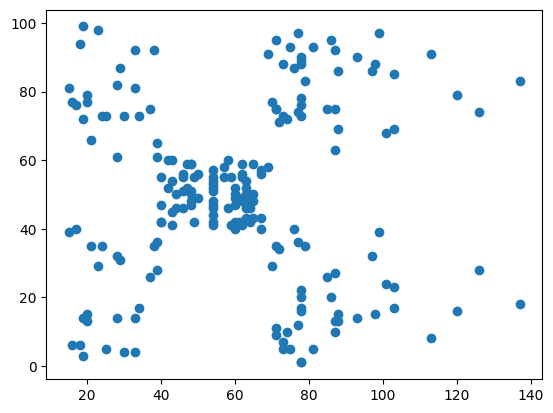

In [89]:
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'])

In [94]:
df1 = df.values

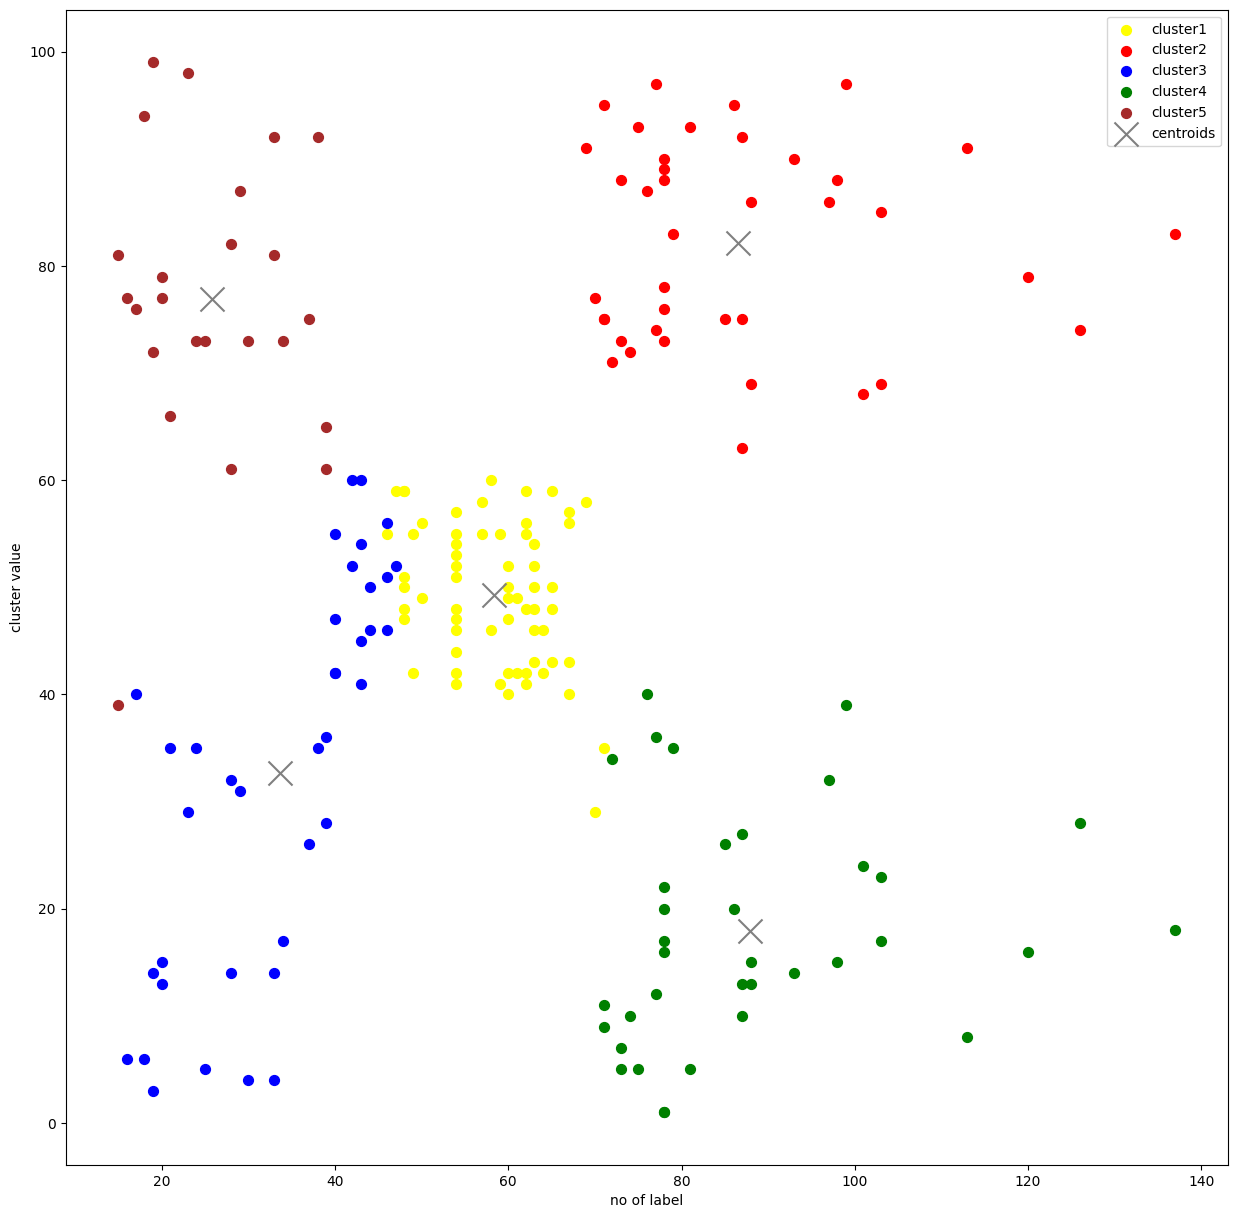

In [95]:
plt.figure(figsize = (15,15))
plt.scatter(df1[y_mean == 0, 3],df1[y_mean == 0,4],color = 'yellow',label = 'cluster1',s = 50)
plt.scatter(df1[y_mean == 1, 3],df1[y_mean == 1,4],color = 'red',label = 'cluster2',s = 50)
plt.scatter(df1[y_mean == 2, 3],df1[y_mean == 2,4],color = 'blue',label = 'cluster3',s = 50)
plt.scatter(df1[y_mean == 3, 3],df1[y_mean == 3,4],color = 'green',label = 'cluster4',s = 50)
plt.scatter(df1[y_mean == 4, 3],df1[y_mean == 4,4],color = 'brown',label = 'cluster5',s = 50)
plt.scatter(kmm.cluster_centers_[:,3],kmm.cluster_centers_[:,4],color = 'grey',label = 'centroids',s= 300,marker = 'x')
plt.xlabel('no of label')
plt.ylabel('cluster value')
plt.legend()
plt.show()

In [96]:
df['cluster'] = pd.DataFrame(y_mean)

In [97]:
df

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,cluster
0,1,1,19,15,39,4
1,2,1,21,15,81,4
2,3,0,20,16,6,2
3,4,0,23,16,77,4
4,5,0,31,17,40,2
...,...,...,...,...,...,...
195,196,0,35,120,79,1
196,197,0,45,126,28,3
197,198,1,32,126,74,1
198,199,1,32,137,18,3
